<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [24]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import bs4

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [139]:
folder = 'C://Users//btros//repos//Lambda//DS-Unit-4-Sprint-1-NLP//BTR//assignments//data//'
jobs = pd.read_csv(folder+'job_listings.csv')
jobs = jobs[['description', 'title']]

In [140]:
test = jobs['description'][0]

In [141]:
jobs['description'] = jobs['description'].apply(lambda x: bs4.BeautifulSoup(x).get_text())

In [142]:
jobs['description'] = jobs['description'].apply(lambda x:''.join(re.findall(r'[^\\n(?=\)]+[.*\w]', x)))

In [143]:
jobs['description'] = jobs['description'].apply(lambda x: ' '.join(x.split()[1:-1]))

In [146]:
jobs['description'][0]

"RequirementsConceptual understanding in Machine Learning models like Naixc2xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of themIntermediate to expert level coding skills in Python/R.Ability to write functions, clean and efficient data manipulation are mandatory for this roleExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in RAbility to communicate Model findings to both Technical and Non-Technical stake holdersHands on experience in SQL/Hive or similar programming languageMust show past work via GitHub, Kaggle or any other published articleMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.Apply"

## 2) Use Spacy to tokenize / clean the listings 

In [147]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [148]:
# Tokenizer Pipe
tokens = []

for doc in tokenizer.pipe(jobs['description'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

jobs['tokens'] = tokens


In [158]:
jobs.head()

,description,title,tokens
0,RequirementsConceptual understanding in Machin...,Data scientist,"[requirementsconceptual, understanding, machin..."
1,"DescriptionAs a Data Scientist 1, you will hel...",Data Scientist I,"[descriptionas, data, scientist, 1,, help, bui..."
2,a Data Scientist you will be working on consul...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,"- $6,756 a monthContractUnder the general supe...",Data Scientist,"[$6,756, monthcontractunder, general, supervis..."
4,USAxe2x80x93 multiple location2+ years of Anal...,Data Scientist,"[usaxe2x80x93, multiple, location2+, years, an..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [157]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(jobs['description'])

# Get sparse dtm
dtm = vect.transform(jobs['description'])


dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head(5)

,00,000,000pay,02115job,03,0356,04,062,06366,08,...,zeus,zf,zfxe2x80x99s,zheng,zillow,zonesability,zoom,zuckerberg,zurich,zurichxe2x80x99s
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

C:\Users\btros\Anaconda3\envs\U4-S1-NLP-DS9\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


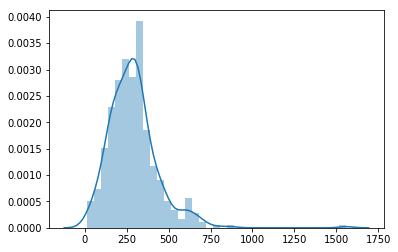

In [160]:
import seaborn as sns

word_counts = [len(token) for token in jobs['tokens']]
sns.distplot(word_counts);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [163]:
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       max_df=.95,
                       min_df=4)

#Create a vocabulary and get word counts per document
# Similar to fit_predict
vect = tfidf.fit_transform(jobs['description'])

# Print word counts

# Get feature names to use as dataframe column headers
vect = pd.DataFrame(vect.todense(), columns= tfidf.get_feature_names())

# View Feature Matrix as a DataFrame
vect.head()

,000,000 employees,04,10,10 years,100,100 000,100 companies,100 countries,11,...,york,york city,youxe2x80x99ll,youxe2x80x99ll dodevelop,youxe2x80x99ll doyou,youxe2x80x99ll work,youxe2x80x99re,youxe2x80x99re looking,youxe2x80x99ve,youyou
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [164]:
from sklearn.neighbors import NearestNeighbors


nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(vect)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [173]:
job =["""Free snacks, top pay, fbgm"""]
n = tfidf.transform(job)
nn.kneighbors(n.todense())

(array([[1.32214295, 1.32214295, 1.35053793, 1.3559035 , 1.35742721]]),
 array([[344, 197,  84,  68,  32]], dtype=int64))

In [174]:
jobs.description[344]

'is leveraging the power of data and technology to transform the worldxe2x80x99s largest asset class - commercial real estate. By structuring the world of property, people and company data wexe2x80x99re able to deliver actionable insights to our customers.Headquartered in New York, Reonomy has raised ~$70 million from top investors, including Sapphire Ventures, Bain Capital, Softbank and Primary Ventures. Our clients represent the biggest names in CRE, including Newmark Knight Frank, Cushman & Wakefield, Tishman Speyer and WeWork.If youxe2x80x99re excited by growth, inovation and the ability to shape one of the biggest markets, join us as our journey is just begininABOUT THE ROLEAs a Data Scientist at Reonomy, you will play a vital role, as your models will be critical components embedded in the pipelines that support everything we offer! We are creating a best-in-class data infrastructure which intelligently links disparate datasets at scale, as well as to manage the complexities of c

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 